<a href="https://colab.research.google.com/github/18celsiya/Financial-analysis/blob/main/Financial_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FINANCIAL ANALYTICS**

**PROBLEM STATEMENT:**

It is important to understand and analyse the competition between the compaines in order to survive competitive world of business. The study aims to examine the market capitilisation and the quartely sales data of the top 500 companies in India. The primary objective is to identify the key metrics and factors, uncover meaningful relationship between the attributes by delving into the given data, derive valuable insights through visualization, and based on the insights suggestion will be provided for a  startegic decisions to improve the business.



Steps:
1. Data understanding.
2. Data cleaning.
3. Exploratory data analysis (EDA).
4. Insights - Key metrics, factors, and attribute relationships

Approaches:

1. Python - Data understanding, cleaning, analysis, EDA
2. Tableau or Power BI - Data visualisation

In [59]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Navigate to the directory containing the file
file_path = '/content/drive/My Drive/Financial Analytics data.csv'

In [62]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

Data understanding:

In [63]:
#Viewing the first 5 records
df.head(5)

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


In [64]:
df

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN
...,...,...,...,...,...
483,496,Lak. Vilas Bank,3029.57,790.17,NaN
484,497,NOCIL,3026.26,249.27,NaN
485,498,Orient Cement,3024.32,511.53,NaN
486,499,Natl.Fertilizer,3017.07,2840.75,NaN


In [65]:
#Shape of the data

df.shape
#There are 488 records and 5 attributes present in the dataset

(488, 5)

In [66]:
#Information about the data

df.info()

#Inference
  # - There are null values present in the variables, Mar Cap and Sales Qtr.
  # - There is a unnamed column present in it.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB


In [67]:
#Summary statistics for numerical data
print(df.describe())

            S.No.  Mar Cap - Crore  Sales Qtr - Crore   Unnamed: 4
count  488.000000       479.000000         365.000000    94.000000
mean   251.508197     28043.857119        4395.976849  1523.870106
std    145.884078     59464.615831       11092.206185  1800.008836
min      1.000000      3017.070000          47.240000     0.000000
25%    122.750000      4843.575000         593.740000   407.167500
50%    252.500000      9885.050000        1278.300000   702.325000
75%    378.250000     23549.900000        2840.750000  2234.815000
max    500.000000    583436.720000      110666.930000  7757.060000


**Summary statistics inference:**

**Market Capitalisation (Mar Cap - Crore):**

*  **Distribution:** The mean (£28043.85 cr) value is greater than the median
(50th percentile - £9885.05), indicating it is heavily right-skewed. This suggests that some companies have a high market capitalisation compared to the majority.
*  **Spread of data:** The standard deviation is relatively larger than the mean value, indicating that the data points are spread widely around the mean value. There is significant variability in the market capitalisation.

**Quarterly Sales (Sales Qtr - Crore):**

*  **Distribution:** The mean (£4395.97) value is greater than the median (£1278.3), indicating it is right-skewed. There are high sales figures for a few companies.
*  **Spread of data:** The standard deviation is relatively large compared to the mean, indicating that the data points are spread widely around the mean value.

The minimum and maximum values of market capitalisation and quarterly sales denote that there are some extreme values present in the data, as it is not normally distributed and there is a range of values present.



In [68]:
#Categorical data
print(df.describe(include = object))

                  Name
count              488
unique             488
top     Reliance Inds.
freq                 1


Summary statistics for a categorical variable

*  Count: There are 488 records in the column 'name of the company'.
*   Unique: There are 488 unique values in the 'name' column and indicates no duplicate records present in it.
*   Top: The company 'Reliance Inds.' is the most frequently occurring name in among all the companies







In [69]:
#How many unique categories/companies in the column 'name'

print(df['Name'].value_counts)

<bound method IndexOpsMixin.value_counts of 0       Reliance Inds.
1                  TCS
2            HDFC Bank
3                  ITC
4              H D F C
            ...       
483    Lak. Vilas Bank
484              NOCIL
485      Orient Cement
486    Natl.Fertilizer
487          L T Foods
Name: Name, Length: 488, dtype: object>


In [70]:
#Null values of each column

print(f"Null values:")
print(df.isnull().sum())

#There are 9, 123, 394 null values in variables Mar cap, sales qtr, unnamed: 4

Null values:
S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
Unnamed: 4           394
dtype: int64


In [71]:
#Duplicate values

print(len(df[df.duplicated(subset = None, keep = "first")]))

#There is no duplicate values present in this dataset

0


In [72]:
#Renaming the column based on our convinence

df.rename(columns = {'S.No.': 'Serial_No','Name':'Name of the company', 'Mar Cap - Crore': 'Market Cap (in crs)', 'Sales Qtr - Crore': 'Quarterly Sales (in crs)'}, inplace = True)
df

,Serial_No,Name of the company,Market Cap (in crs),Quarterly Sales (in crs),Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN
...,...,...,...,...,...
483,496,Lak. Vilas Bank,3029.57,790.17,NaN
484,497,NOCIL,3026.26,249.27,NaN
485,498,Orient Cement,3024.32,511.53,NaN
486,499,Natl.Fertilizer,3017.07,2840.75,NaN


**DATA CLEANING**

The serial numbers start from 1 and end at 500, but we only have 488 records in total in the dataset.
There may be missing serial numbers within the range. Therefore, we need to ensure that the serial numbers are in sequential order.
**Even though the serial number may not be important for other purposes such as finding correlations or creating plots, it is necessary to ensure it is in sequential order for proper alignment or data integrity purposes.**

Some company names with only capital words have space between it and hence we remove it to ensure consistency.

In [73]:
import re
# Remove spaces between individual letters in the company names
# Strip spaces from only capitalised company names
df['Name of the company'] = df['Name of the company'].apply(lambda x: x.replace(' ', '') if x.isupper() else x)

df

,Serial_No,Name of the company,Market Cap (in crs),Quarterly Sales (in crs),Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,HDFC,289497.37,16840.51,NaN
...,...,...,...,...,...
483,496,Lak. Vilas Bank,3029.57,790.17,NaN
484,497,NOCIL,3026.26,249.27,NaN
485,498,Orient Cement,3024.32,511.53,NaN
486,499,Natl.Fertilizer,3017.07,2840.75,NaN


The values in the unnamed column were incorrectly placed, and they should be in the 'Quarterly Sales' column. Hence, we shift the unnamed column values to quarterly sales column

In [74]:
#Filling the missing values in the quarterly sales column with the values of unnamed column
df['Quarterly Sales (in crs)'] = df['Quarterly Sales (in crs)'].fillna(df['Unnamed: 4'])
df

,Serial_No,Name of the company,Market Cap (in crs),Quarterly Sales (in crs),Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,HDFC,289497.37,16840.51,NaN
...,...,...,...,...,...
483,496,Lak. Vilas Bank,3029.57,790.17,NaN
484,497,NOCIL,3026.26,249.27,NaN
485,498,Orient Cement,3024.32,511.53,NaN
486,499,Natl.Fertilizer,3017.07,2840.75,NaN


In [75]:
#Dropping the unnecessary columns - Serial no and unnamed column
df.drop(columns = ['Unnamed: 4', 'Serial_No'], inplace = True)

In [76]:
df.shape

(488, 3)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name of the company       488 non-null    object 
 1   Market Cap (in crs)       479 non-null    float64
 2   Quarterly Sales (in crs)  459 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.6+ KB


Filling the nan values with the median values of mark cap and quarterly sales.
Why median, not mean? Because the distribution of both the variables are not noramally distribution and it's skewed. And median is robust to extreme values/outliers and less affected by fluctuations compared to mean. The mean value is extermely high and choosing median value is appropiate in this case and a more robust measure of central tendency.

In [78]:
df['Market Cap (in crs)'] = df['Market Cap (in crs)'].fillna(df['Market Cap (in crs)'].median())
df['Quarterly Sales (in crs)'] = df['Quarterly Sales (in crs)'].fillna(df['Quarterly Sales (in crs)'].median())
df

,Name of the company,Market Cap (in crs),Quarterly Sales (in crs)
0,Reliance Inds.,583436.72,99810.00
1,TCS,563709.84,30904.00
2,HDFC Bank,482953.59,20581.27
3,ITC,320985.27,9772.02
4,HDFC,289497.37,16840.51
...,...,...,...
483,Lak. Vilas Bank,3029.57,790.17
484,NOCIL,3026.26,249.27
485,Orient Cement,3024.32,511.53
486,Natl.Fertilizer,3017.07,2840.75


In [79]:
df.isnull().sum()
#No missing values

Name of the company         0
Market Cap (in crs)         0
Quarterly Sales (in crs)    0
dtype: int64

In [80]:
df

,Name of the company,Market Cap (in crs),Quarterly Sales (in crs)
0,Reliance Inds.,583436.72,99810.00
1,TCS,563709.84,30904.00
2,HDFC Bank,482953.59,20581.27
3,ITC,320985.27,9772.02
4,HDFC,289497.37,16840.51
...,...,...,...
483,Lak. Vilas Bank,3029.57,790.17
484,NOCIL,3026.26,249.27
485,Orient Cement,3024.32,511.53
486,Natl.Fertilizer,3017.07,2840.75


**EXPLORATORY DATA ANALYSIS**

1. Distribution plot for Mar Cap and Quarterly Sales.
2. Correlation between Mar Cap and Quarterly Sales.

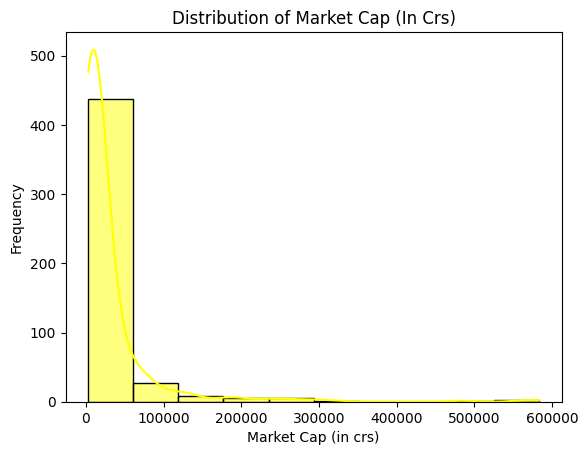

In [81]:
#Distribution plot

# Plotting a histogram
sns.histplot(df['Market Cap (in crs)'], bins=10, color = 'yellow', kde=True)

# Adding labels and title
plt.xlabel('Market Cap (in crs)')
plt.ylabel('Frequency')
plt.title('Distribution of Market Cap (In Crs)')

# Display the plot
plt.show()


1. Most of the market capitalisation values fall below the range of 500,000 crores, with only a few values exceeding 300,000 crores.
2. The distribution is right-skewed.

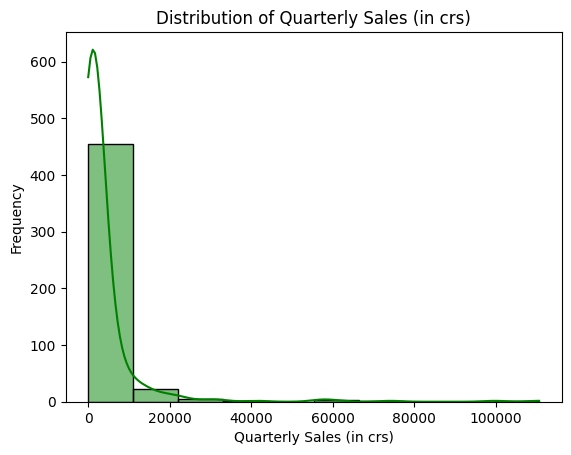

In [82]:
# Plotting a histogram
sns.histplot(df['Quarterly Sales (in crs)'], bins=10, color = 'green', kde=True)

# Adding labels and title
plt.xlabel('Quarterly Sales (in crs)')
plt.ylabel('Frequency')
plt.title('Distribution of Quarterly Sales (in crs)')

# Display the plot
plt.show()

1. The quarterly sales values falls below 20000 crs.
2. The distribution is not normal, it is right skewed.


In [83]:
#Correlation
correlation_matrix = df[['Market Cap (in crs)', 'Quarterly Sales (in crs)']].corr()

print(correlation_matrix)

                          Market Cap (in crs)  Quarterly Sales (in crs)
Market Cap (in crs)                   1.00000                   0.62569
Quarterly Sales (in crs)              0.62569                   1.00000


1. The correlation coefficient of 0.62569 between Market Cap and Quarterly sales indicates a moderately strong positive correlation.
2. This indicates there is a possibility that companies with higher mar cap have higher quarterly sales and vice versa.

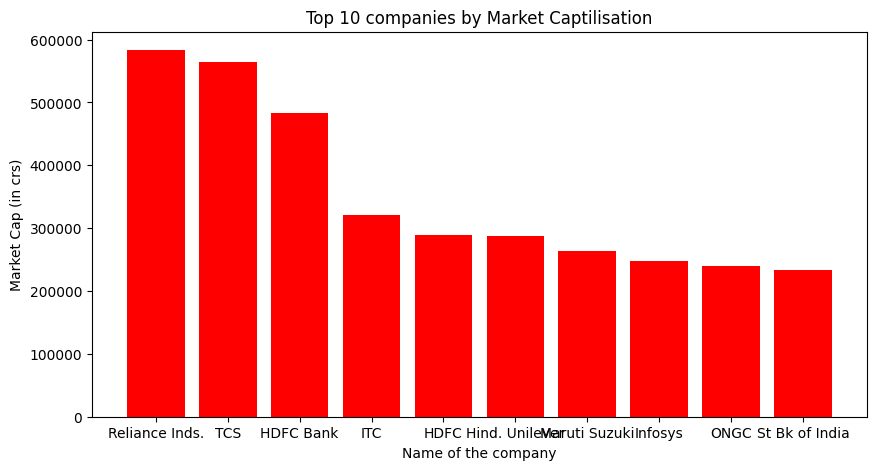

In [84]:
# Top 10 companies by Market Capitalisation

top_10_companies_mar_cap = df.nlargest(10, 'Market Cap (in crs)')

#Plot of top 10 companies by Market Capitalisation
plt.figure(figsize=(10, 5))
plt.bar(top_10_companies_mar_cap['Name of the company'],top_10_companies_mar_cap['Market Cap (in crs)'], color = 'red')
plt.xlabel('Name of the company')
plt.ylabel('Market Cap (in crs)')
plt.title('Top 10 companies by Market Captilisation')
plt.show()

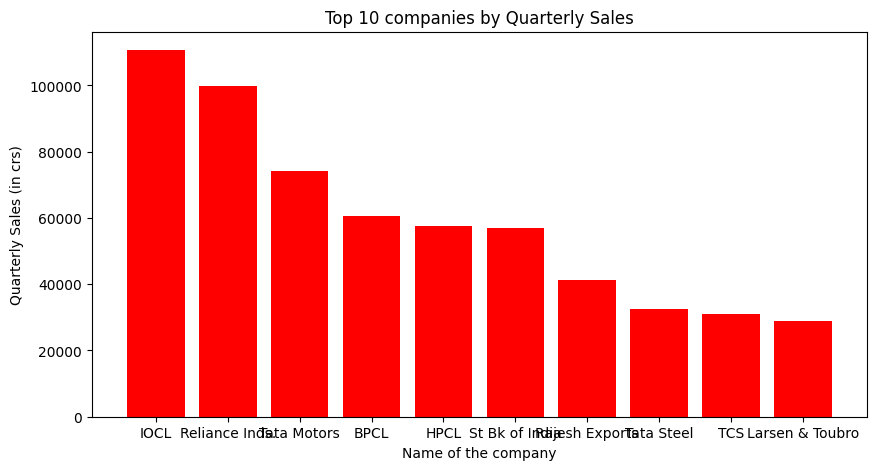

In [85]:
# Top 10 companies by Quarterly sales

top_10_companies_Quarterly_sales = df.nlargest(10, 'Quarterly Sales (in crs)')

#Plot of top 10 companies by Market Capitalisation
plt.figure(figsize=(10, 5))
plt.bar(top_10_companies_Quarterly_sales['Name of the company'],top_10_companies_Quarterly_sales['Quarterly Sales (in crs)'], color = 'red')
plt.xlabel('Name of the company')
plt.ylabel('Quarterly Sales (in crs)')
plt.title('Top 10 companies by Quarterly Sales')
plt.show()

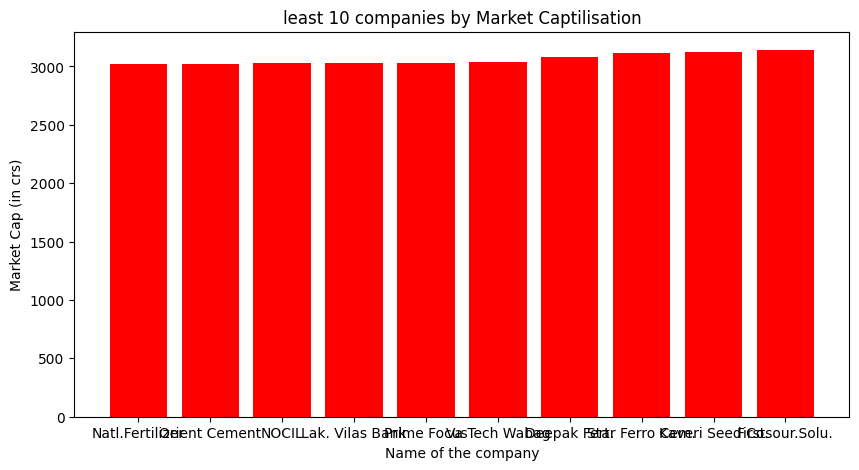

In [86]:
# Leat 10 companies by Market Capitalisation

least_10_companies_mar_cap = df.nsmallest(10, 'Market Cap (in crs)')

#Plot of top 10 companies by Market Capitalisation
plt.figure(figsize=(10, 5))
plt.bar(least_10_companies_mar_cap['Name of the company'],least_10_companies_mar_cap['Market Cap (in crs)'], color = 'red')
plt.xlabel('Name of the company')
plt.ylabel('Market Cap (in crs)')
plt.title('least 10 companies by Market Captilisation')
plt.show()

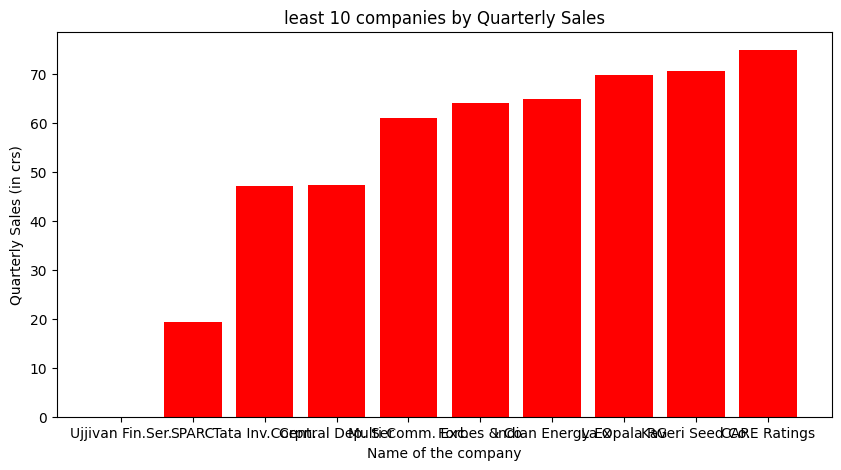

In [87]:
# Bottom 10 companies by Quarterly sales

least_10_companies_Quarterly_sales = df.nsmallest(10, 'Quarterly Sales (in crs)')

#Plot of top 10 companies by Market Capitalisation
plt.figure(figsize=(10, 5))
plt.bar(least_10_companies_Quarterly_sales['Name of the company'],least_10_companies_Quarterly_sales['Quarterly Sales (in crs)'], color = 'red')
plt.xlabel('Name of the company')
plt.ylabel('Quarterly Sales (in crs)')
plt.title('least 10 companies by Quarterly Sales')
plt.show()